# Income Evaluation

In [1]:
#import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [88]:
# read data
df = pd.read_csv('income_evaluation.csv')
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
df.shape

(32561, 15)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              32561 non-null  int64 
 1    workclass       32561 non-null  object
 2    fnlwgt          32561 non-null  int64 
 3    education       32561 non-null  object
 4    education-num   32561 non-null  int64 
 5    marital-status  32561 non-null  object
 6    occupation      32561 non-null  object
 7    relationship    32561 non-null  object
 8    race            32561 non-null  object
 9    sex             32561 non-null  object
 10   capital-gain    32561 non-null  int64 
 11   capital-loss    32561 non-null  int64 
 12   hours-per-week  32561 non-null  int64 
 13   native-country  32561 non-null  object
 14   income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [5]:
# check missing values
df.isnull().sum().sum()

0

In [6]:
df.columns

Index(['age', ' workclass', ' fnlwgt', ' education', ' education-num',
       ' marital-status', ' occupation', ' relationship', ' race', ' sex',
       ' capital-gain', ' capital-loss', ' hours-per-week', ' native-country',
       ' income'],
      dtype='object')

There's a space at the beginning of some column names. We need to take care of this

In [7]:
np.unique(df[' income'])

array([' <=50K', ' >50K'], dtype=object)

In [8]:
np.unique(df[' marital-status'])

array([' Divorced', ' Married-AF-spouse', ' Married-civ-spouse',
       ' Married-spouse-absent', ' Never-married', ' Separated',
       ' Widowed'], dtype=object)

Drop unnecessary columns

In [9]:
df.drop(columns=' fnlwgt', inplace=True)

## Renaming column names

Assigning proper names to the columns.

In [10]:
col_names = ['age', 'workclass', 'education', 'education_num', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country','income']
df.columns = col_names
df.columns

Index(['age', 'workclass', 'education', 'education_num', 'marital_status',
       'occupation', 'relationship', 'race', 'sex', 'capital_gain',
       'capital_loss', 'hours_per_week', 'native_country', 'income'],
      dtype='object')

## Data Preprocessing

In [11]:
# Adding new categorical column
bins = [16, 24, 64, 90]
labels = ['young', 'adult', 'old']
df['age_types'] = pd.cut(df['age'], bins=bins, labels=labels)
df['income_num'] = np.where(df['income'] == ' >50k', 1, 0).astype('int16')
df.sample(5)

,age,workclass,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income,age_types,income_num
12855,28,Private,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,55,United-States,<=50K,adult,0
16818,55,State-gov,HS-grad,9,Married-civ-spouse,Tech-support,Wife,White,Female,0,1887,40,United-States,>50K,adult,0
31652,40,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,4386,0,50,United-States,>50K,adult,0
29315,23,Private,Bachelors,13,Never-married,Sales,Own-child,White,Female,0,0,40,United-States,<=50K,young,0
6904,36,Private,HS-grad,9,Married-civ-spouse,Transport-moving,Husband,White,Male,7298,0,50,United-States,>50K,adult,0


#### Stripping all spaces in the data columns

In [12]:
np.unique(df.education)

array([' 10th', ' 11th', ' 12th', ' 1st-4th', ' 5th-6th', ' 7th-8th',
       ' 9th', ' Assoc-acdm', ' Assoc-voc', ' Bachelors', ' Doctorate',
       ' HS-grad', ' Masters', ' Preschool', ' Prof-school',
       ' Some-college'], dtype=object)

In [13]:
df.columns

Index(['age', 'workclass', 'education', 'education_num', 'marital_status',
       'occupation', 'relationship', 'race', 'sex', 'capital_gain',
       'capital_loss', 'hours_per_week', 'native_country', 'income',
       'age_types', 'income_num'],
      dtype='object')

In [14]:
strip_columns = ['workclass', 'education', 'marital_status',
       'occupation', 'relationship', 'race', 'sex', 'native_country', 'income']

In [15]:
for i in strip_columns:
    df[i] = df[i].str.strip()

In [16]:
np.unique(df.workclass)

array(['?', 'Federal-gov', 'Local-gov', 'Never-worked', 'Private',
       'Self-emp-inc', 'Self-emp-not-inc', 'State-gov', 'Without-pay'],
      dtype=object)

#### Finding Categorical and Numerical Columns

In [19]:
categorical = [var for var in df.columns if df[var].dtype==object]

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are: \n\n', categorical)

There are 9 categorical variables

The categorical variables are: 

 ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country', 'income']


In [21]:
numerical = [var_1 for var_1 in df.columns if df[var_1].dtype=='int64']

print('There are {} numerical variables\n'.format(len(numerical)))

print('The numerical variables are: \n\n', numerical)

There are 5 numerical variables

The numerical variables are: 

 ['age', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']


In [24]:
for var in categorical:
    print(df[var].value_counts())

workclass
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64
education
HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: count, dtype: int64
marital_status
Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: count, dtype: int64
occupation
Prof-specialty       4140
Craft-repair         4099
Exec-managerial      

Now, the columns workclass, occupation, and native_country contain missing values. Confirm using the 'loc' operator.

In [26]:
df.loc[df['workclass']=="?"]

,age,workclass,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income,age_types,income_num
27,54,?,Some-college,10,Married-civ-spouse,?,Husband,Asian-Pac-Islander,Male,0,0,60,South,>50K,adult,0
61,32,?,7th-8th,4,Married-spouse-absent,?,Not-in-family,White,Male,0,0,40,?,<=50K,adult,0
69,25,?,Some-college,10,Never-married,?,Own-child,White,Male,0,0,40,United-States,<=50K,adult,0
77,67,?,10th,6,Married-civ-spouse,?,Husband,White,Male,0,0,2,United-States,<=50K,old,0
106,17,?,10th,6,Never-married,?,Own-child,White,Female,34095,0,32,United-States,<=50K,young,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32530,35,?,Bachelors,13,Married-civ-spouse,?,Wife,White,Female,0,0,55,United-States,>50K,adult,0
32531,30,?,Bachelors,13,Never-married,?,Not-in-family,Asian-Pac-Islander,Female,0,0,99,United-States,<=50K,adult,0
32539,71,?,Doctorate,16,Married-civ-spouse,?,Husband,White,Male,0,0,10,United-States,>50K,old,0
32541,41,?,HS-grad,9,Separated,?,Not-in-family,Black,Female,0,0,32,United-States,<=50K,adult,0


In [27]:
df.loc[df['occupation']=="?"]

,age,workclass,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income,age_types,income_num
27,54,?,Some-college,10,Married-civ-spouse,?,Husband,Asian-Pac-Islander,Male,0,0,60,South,>50K,adult,0
61,32,?,7th-8th,4,Married-spouse-absent,?,Not-in-family,White,Male,0,0,40,?,<=50K,adult,0
69,25,?,Some-college,10,Never-married,?,Own-child,White,Male,0,0,40,United-States,<=50K,adult,0
77,67,?,10th,6,Married-civ-spouse,?,Husband,White,Male,0,0,2,United-States,<=50K,old,0
106,17,?,10th,6,Never-married,?,Own-child,White,Female,34095,0,32,United-States,<=50K,young,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32530,35,?,Bachelors,13,Married-civ-spouse,?,Wife,White,Female,0,0,55,United-States,>50K,adult,0
32531,30,?,Bachelors,13,Never-married,?,Not-in-family,Asian-Pac-Islander,Female,0,0,99,United-States,<=50K,adult,0
32539,71,?,Doctorate,16,Married-civ-spouse,?,Husband,White,Male,0,0,10,United-States,>50K,old,0
32541,41,?,HS-grad,9,Separated,?,Not-in-family,Black,Female,0,0,32,United-States,<=50K,adult,0


There is a good amount of rows where workclass, native_coountry and occupation columns have no values maybe because the participants didn't feel comfortable sharing this information. We can either remove these rows or make their values equal to NaN. We use the second option since we may drop crucial data points by deleting the rows.

In [28]:
df.loc[df['workclass']=='?', 'workclass'] = np.NaN
# alternative
#df['workclass'].replace('?', np.NaN, inplace=True)
df.loc[df['occupation']=='?', 'occupation'] = np.NaN
df.loc[df['native_country']=='?', 'native_country'] = np.NaN

In [29]:
df.workclass.value_counts()

workclass
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64

In [32]:
df.isnull().sum()

age                  0
workclass         1836
education            0
education_num        0
marital_status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country     583
income               0
age_types            0
income_num           0
dtype: int64

## Data Visualization

Let's visualize income, the target variable

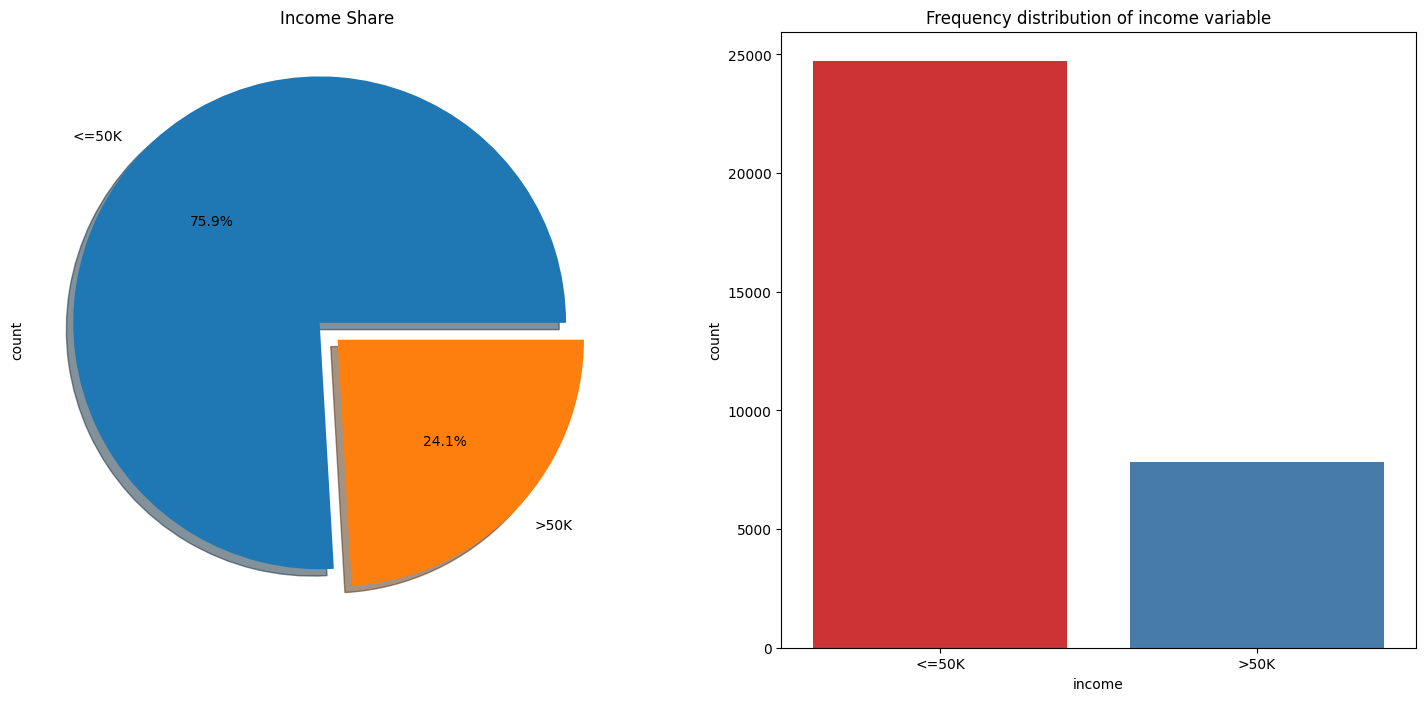

In [33]:
f,ax = plt.subplots(1,2,figsize=(18,8))

ax[0] = df['income'].value_counts().plot.pie(explode=[0.1,0.0],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Income Share')

#f,ax = plt.subplots(figsize=(6,8))
ax[1] = sns.countplot(x='income', data=df, palette="Set1")
ax[1].set_title("Frequency distribution of income variable")

plt.show()

In [34]:
df['income'].value_counts()/len(df)

income
<=50K    0.75919
>50K     0.24081
Name: count, dtype: float64

In [35]:
more_than_50 = df[df['income'] == '>50K']
less_than_50 = df[df['income'] == '<=50K']
print(more_than_50.shape, less_than_50.shape)

(7841, 16) (24720, 16)


The target variable is highly imbalanced and the machine learning algorithm used will be biased towards this kind of output(the one with higher number of outputs). We will balance this variable later.

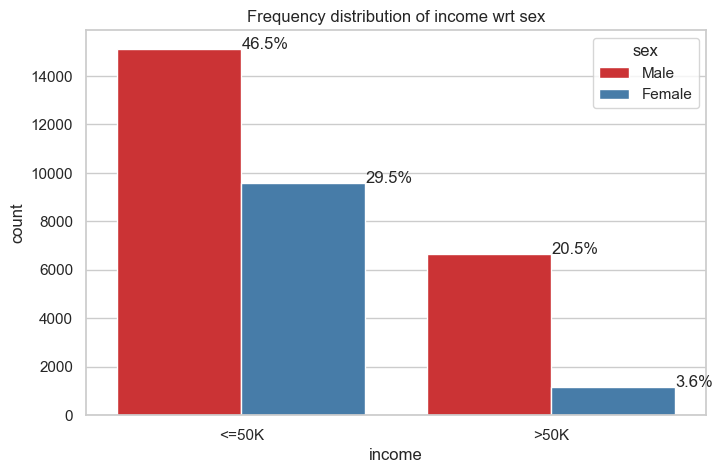

In [37]:
# frequency distribution of income wrt sex
sns.set(style='whitegrid')
plt.figure(figsize=(8,5))
total = float(len(df))
ax = sns.countplot(x='income', hue='sex', data=df, palette='Set1')
ax.set_title("Frequency distribution of income wrt sex")
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x,y), ha='left')
plt.show()

Males seem to earn more than females in both categories.

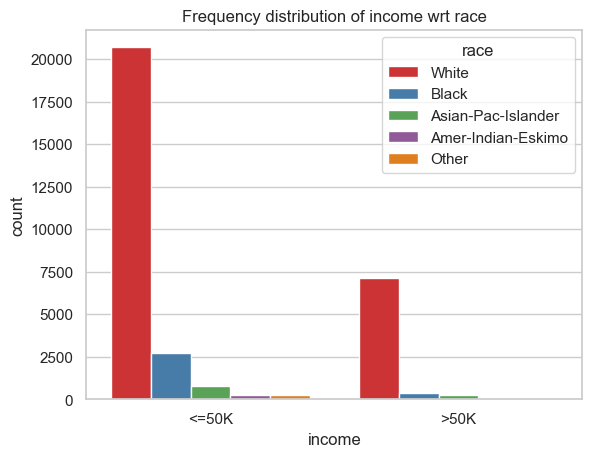

In [38]:
# Frequency distribution of income wrt race
ax = sns.countplot(x='income', hue='race', data=df, palette="Set1")
ax.set_title("Frequency distribution of income wrt race")
plt.show()

The whites maake more money than non-whites in both income categories.

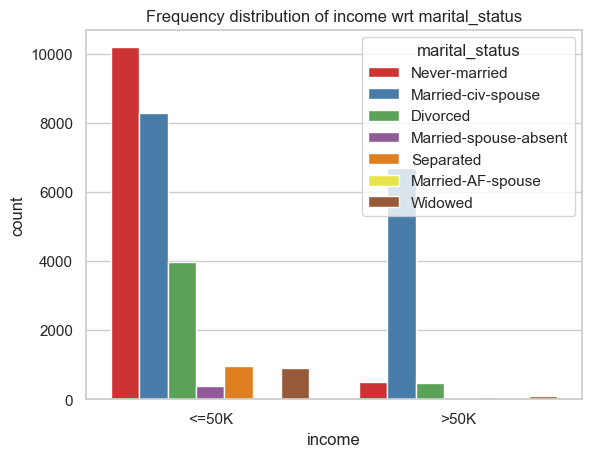

In [40]:
# Frequency distribution of income wrt marital_status
ax = sns.countplot(x='income', hue='marital_status', data=df, palette="Set1")
ax.set_title("Frequency distribution of income wrt marital_status")
plt.show()

Individuals who are never married make less than 50k whereas married people earn more. Maybe because married people have a partner who keeps them motivated.

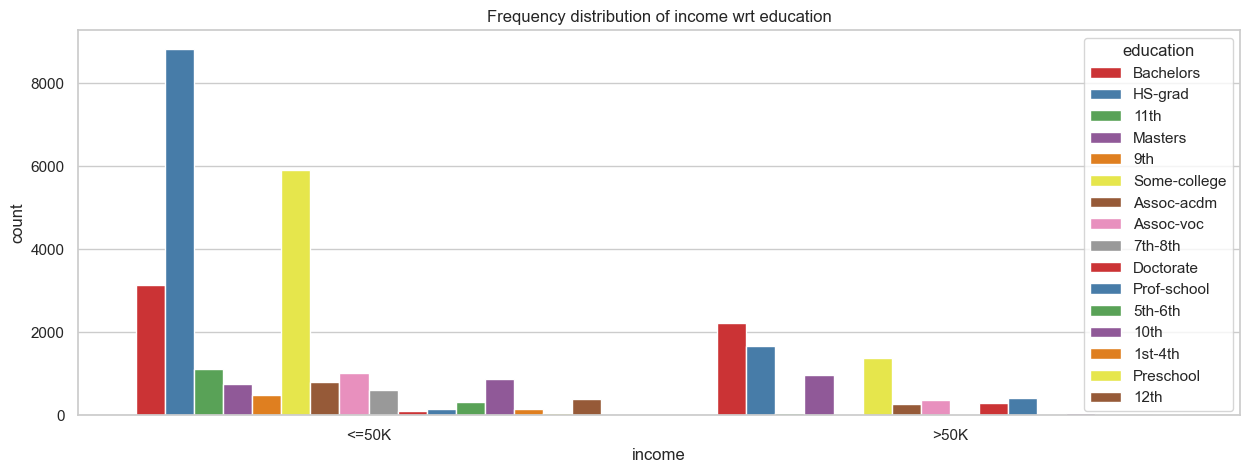

In [41]:
# Frequency distribution of income wrt education
f,ax = plt.subplots(figsize=(15, 5))
ax = sns.countplot(x='income', hue='education', data=df, palette="Set1")
ax.set_title("Frequency distribution of income wrt education")
plt.show()

Highschool graduates seem to be earning more than people with masters degrees which is not normal. We need to observe more on these individuals.

In [42]:
temp_2 = df.loc[(df['income'] == '>50K') & (df['education'] =="HS-grad")]

<Axes: xlabel='marital_status', ylabel='count'>

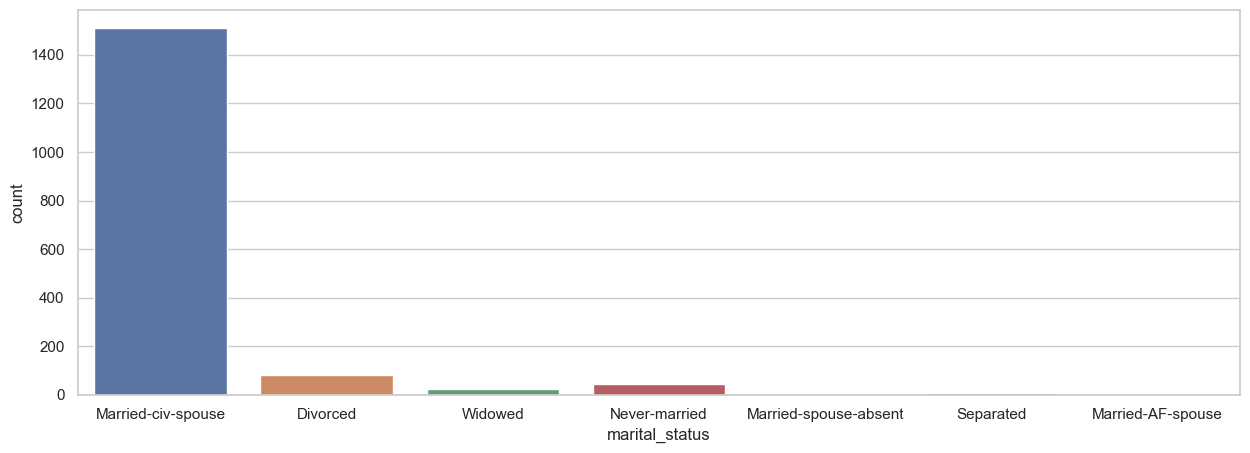

In [43]:
plt.figure(figsize=(15,5))
sns.countplot(x='marital_status', data=temp_2)

In [44]:
temp_2.columns

Index(['age', 'workclass', 'education', 'education_num', 'marital_status',
       'occupation', 'relationship', 'race', 'sex', 'capital_gain',
       'capital_loss', 'hours_per_week', 'native_country', 'income',
       'age_types', 'income_num'],
      dtype='object')

In [47]:
temp_3 = df.loc[(df['income'] == ">50K") & (df['education'] == 'Masters')]

<Axes: xlabel='marital_status', ylabel='count'>

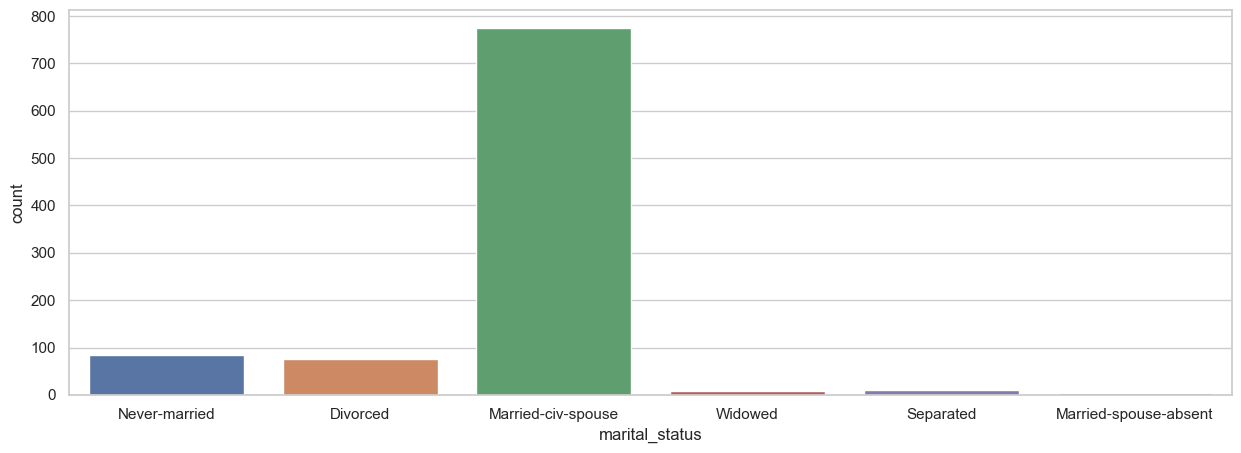

In [48]:
plt.figure(figsize=(15,5))
sns.countplot(x='marital_status', data=temp_3)

## Numerical Columns

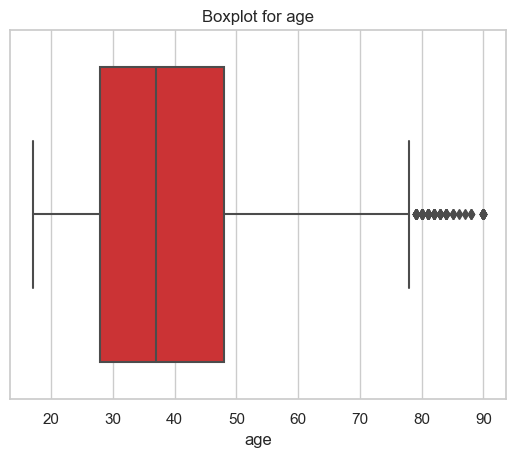

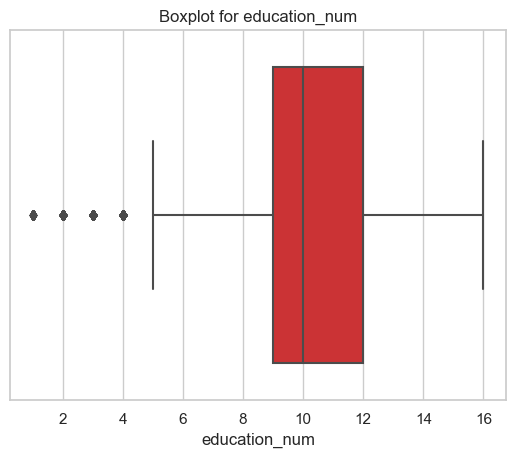

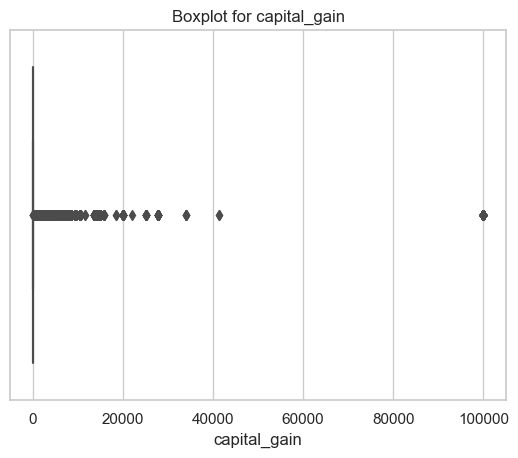

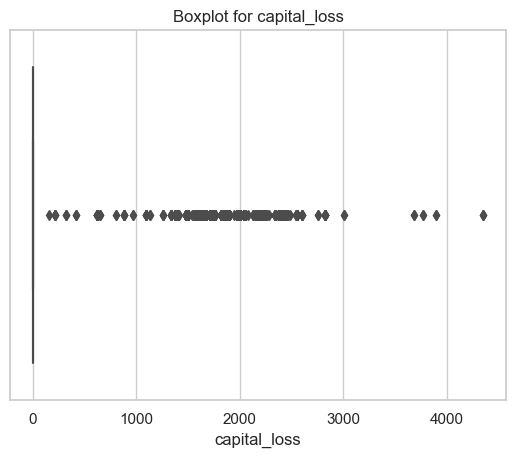

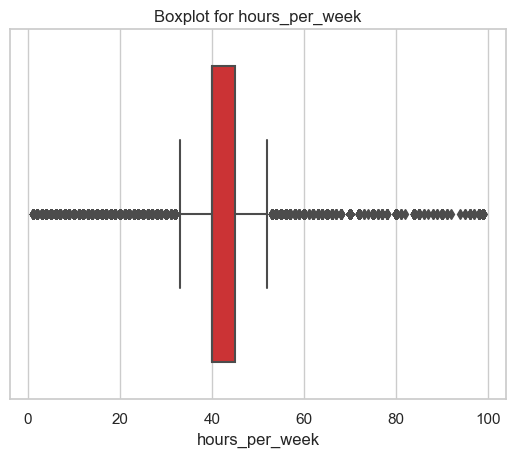

In [49]:
# Checking for outliers in numerical columns
for i in numerical:
    sns.boxplot(x = df[i][1:], data = df.iloc[1:], order=df[i][1:].value_counts().index, palette='Set1')
    plt.title("Boxplot for {}".format(i))
    plt.show()

We have otliers in the capital gain and capital loss variables. Let's examine these plots closely.

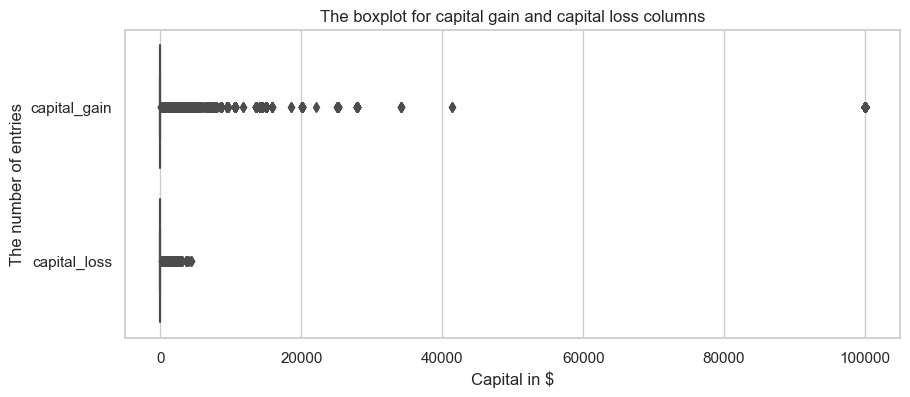

In [51]:
plt.figure(figsize=(10,4))
plt.title("The boxplot for capital gain and capital loss columns")
sns.boxplot(data=df[['capital_gain', 'capital_loss']], orient='h')
plt.ylabel('The number of entries')
plt.xlabel("Capital in $")
plt.show()

Dropping the outliers since they could distort our results.

In [52]:
out = df.loc[df['capital_gain'] > 90000, 'capital_gain'].index
df.drop(index=out, inplace=True)

In [53]:
out2 = df.loc[df['capital_loss'] > 4000, 'capital_loss'].index
df.drop(index=out2, inplace=True)

### Histograms to check distribution of numerical variables

In [54]:
numerical

['age', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']

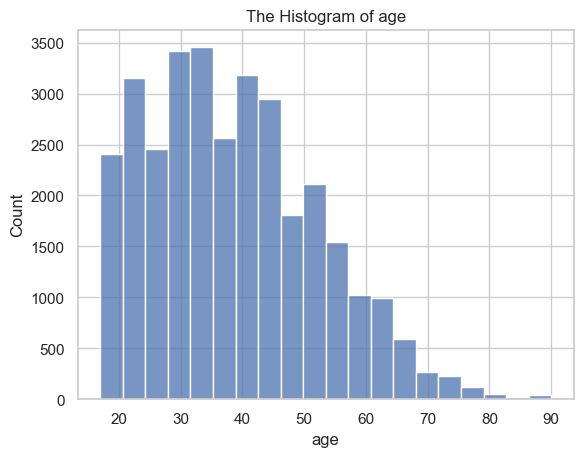

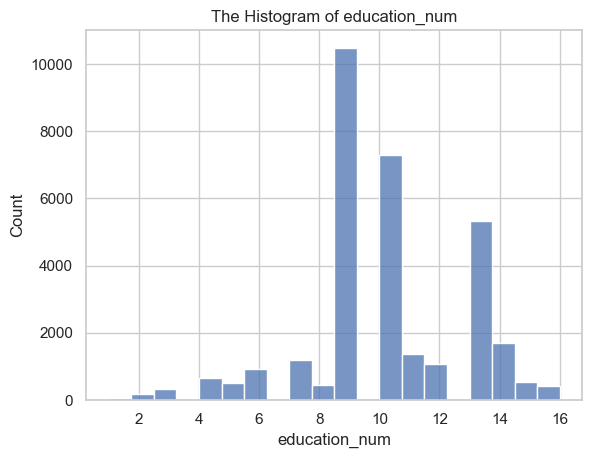

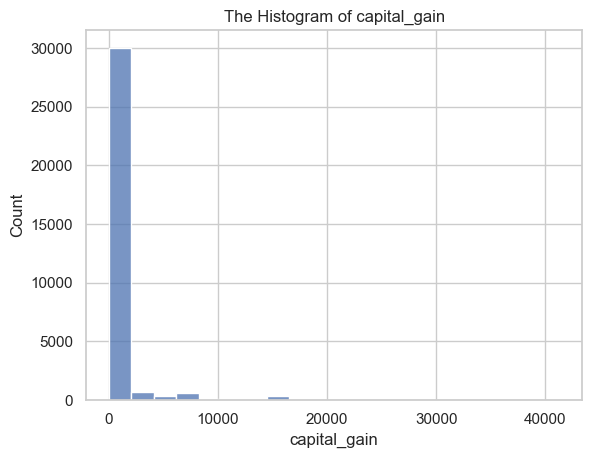

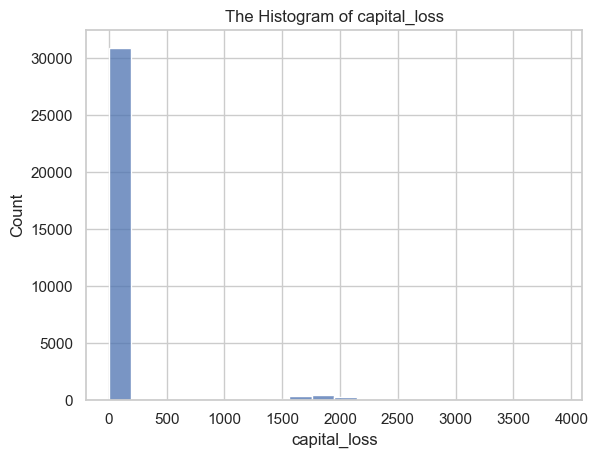

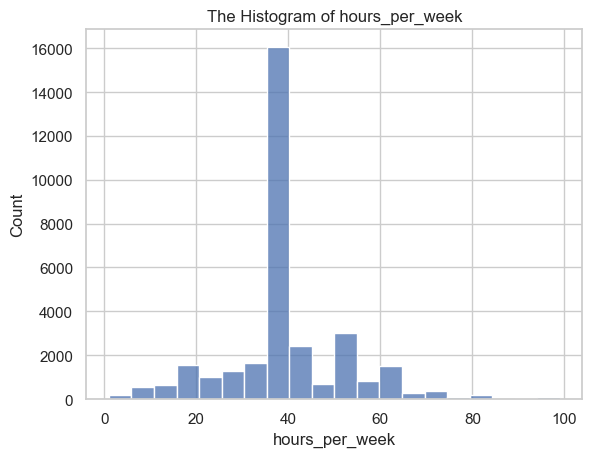

In [56]:
for i in numerical:
    sns.histplot(x=df[i], bins=20)
    plt.title("The Histogram of {}".format(i))
    plt.show()

The moajority of people are between 20-50 age range. The graph is rightly skewed so we normalize by scaling. The majority of hours per week are no more than 50 h/w, and the highest count is about 40 h/w (8 hours per day)

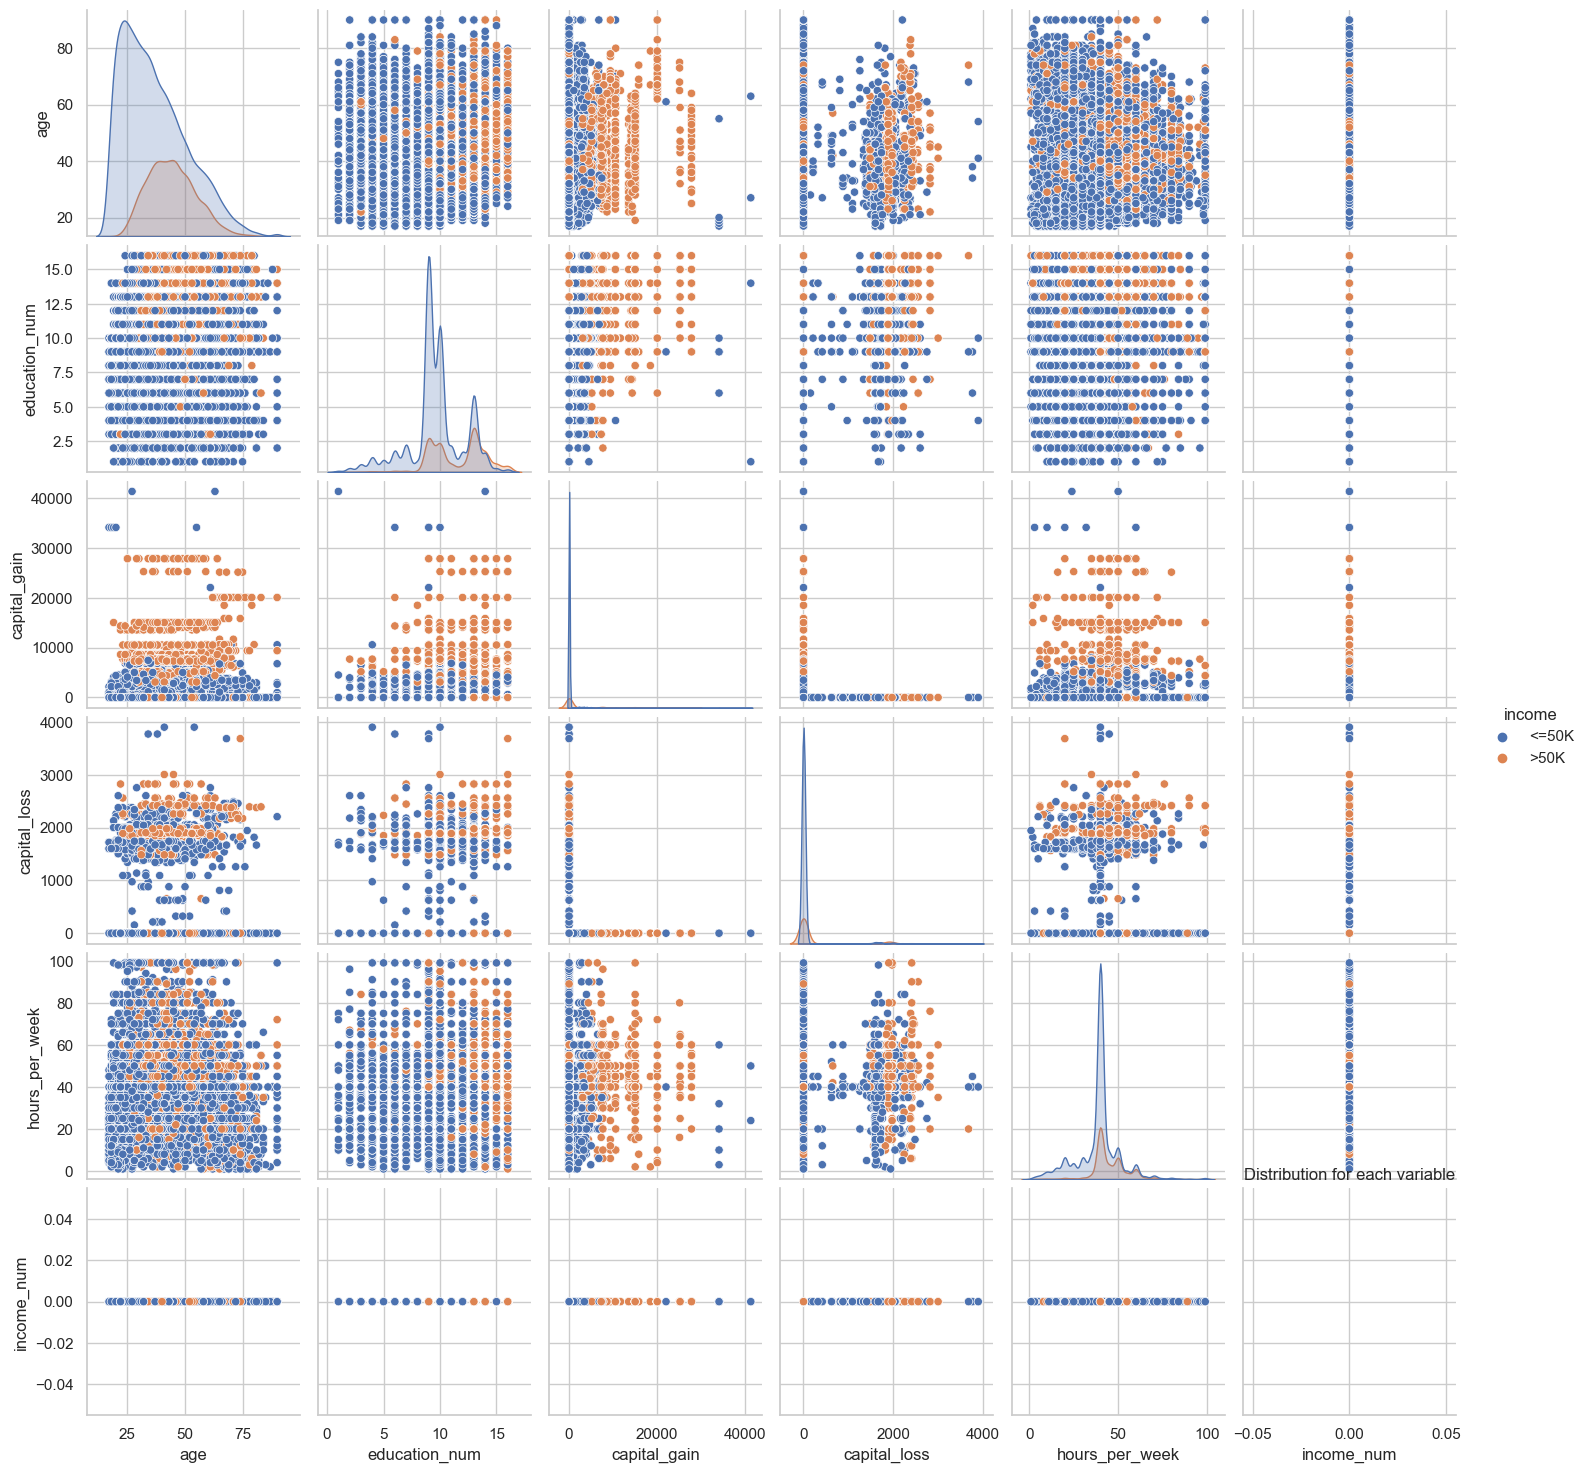

In [57]:
# Distribution for each variable
sns.pairplot(data=df, hue='income')
plt.title('Distribution for each variable')
plt.show()

## Categorical Columns

In [58]:
categorical

['workclass',
 'education',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native_country',
 'income']

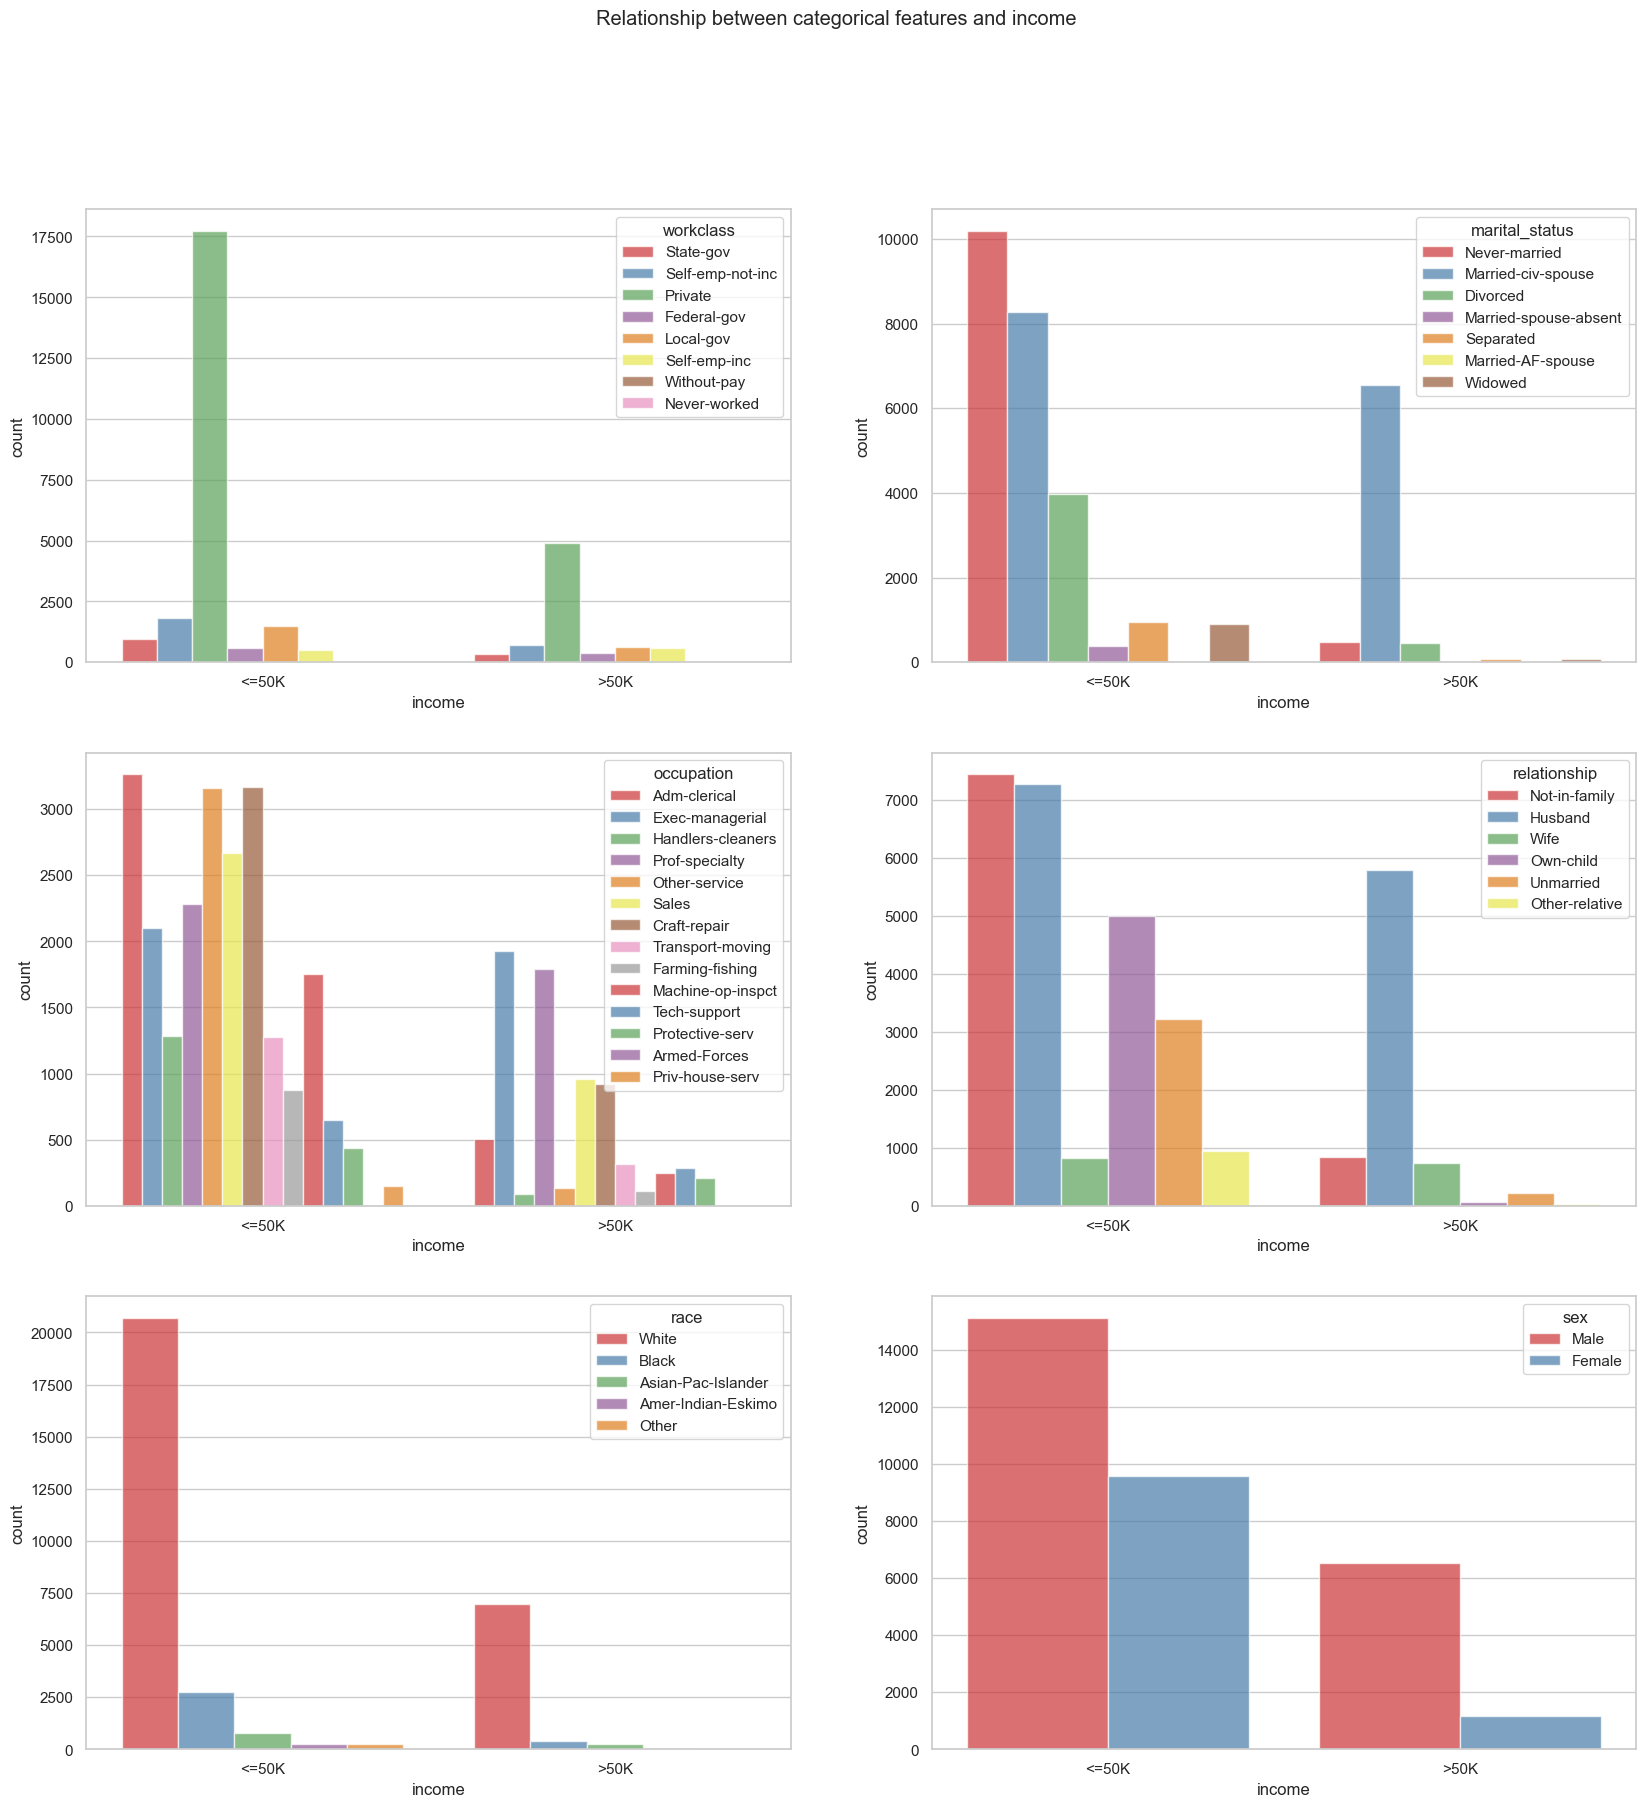

In [59]:
fig, axs = plt.subplots(3, 2, figsize=(20,20))
axs = axs.flatten()
fig.suptitle('Relationship between categorical features and income')

categorical2 = ['workclass', 'marital_status', 'occupation', 'relationship', 'race', 'sex']
for ax, i in enumerate(categorical2):
    sns.countplot(x='income', alpha=0.7, hue=i, data=df, ax=axs[ax], palette="Set1")

## Dependent and Independent Variables

In [61]:
X = df.drop(columns='income')
y = df['income']

## Label Encoding

In [62]:
from sklearn.preprocessing import LabelEncoder
def label_encoder(a):
    le = LabelEncoder()
    df[a] = le.fit_transform(df[a])

In [63]:
label_list = ['workclass', 'education','marital_status',
       'occupation', 'relationship', 'race', 'sex','native_country', 'income']
for i in label_list:
    label_encoder(i)

In [64]:
df.sample(10)

,age,workclass,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income,age_types,income_num
18338,32,3,9,13,4,0,1,1,1,0,0,40,38,0,adult,0
13576,25,3,11,9,4,2,1,4,1,0,0,40,38,0,adult,0
24853,18,3,1,7,4,7,3,4,1,0,0,15,28,0,young,0
28726,49,3,11,9,6,0,4,4,0,0,0,40,38,0,adult,0
14728,43,6,14,15,2,9,0,4,1,0,0,50,38,1,adult,0
14567,60,6,11,9,6,0,1,4,0,0,0,35,38,0,adult,0
20796,30,3,11,9,4,6,1,4,1,0,0,40,38,0,adult,0
25819,63,8,9,13,2,14,0,4,1,0,2179,45,38,0,adult,0
17443,64,3,15,10,6,11,1,4,0,0,0,40,38,0,adult,0
18678,70,5,12,14,2,3,0,4,1,0,2246,8,38,1,old,0


In [65]:
## Normalizing the Variables
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [66]:
df.sample(5)

,age,workclass,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income,age_types,income_num
28692,38,1,8,11,0,3,3,4,1,0,0,40,38,0,adult,0
24557,53,3,0,6,0,0,4,4,0,0,0,48,38,0,adult,0
16148,28,4,11,9,4,0,3,4,0,0,0,35,38,0,adult,0
7905,62,8,5,4,6,14,1,2,1,0,0,40,38,0,adult,0
27536,27,3,15,10,4,0,3,4,1,0,0,30,38,0,adult,0


In [67]:
scaler.fit(df.drop(['income', 'age_types', 'income_num'], axis=1))

MinMaxScaler()

In [68]:
scaled_features = scaler.transform(df.drop(['income', 'age_types', 'income_num'], axis=1))

In [69]:
df.columns

Index(['age', 'workclass', 'education', 'education_num', 'marital_status',
       'occupation', 'relationship', 'race', 'sex', 'capital_gain',
       'capital_loss', 'hours_per_week', 'native_country', 'income',
       'age_types', 'income_num'],
      dtype='object')

In [70]:
columns=['age', 'workclass', 'education', 'education_num', 'marital_status',
       'occupation', 'relationship', 'race', 'sex', 'capital_gain',
       'capital_loss', 'hours_per_week', 'native_country']

df_scaled = pd.DataFrame(scaled_features,columns=columns)
df_scaled.head()

,age,workclass,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country
0,0.301370,0.750,0.600000,0.800000,0.666667,0.000000,0.2,1.0,1.0,0.052626,0.0,0.397959,0.926829
1,0.452055,0.625,0.600000,0.800000,0.333333,0.214286,0.0,1.0,1.0,0.000000,0.0,0.122449,0.926829
2,0.287671,0.375,0.733333,0.533333,0.000000,0.357143,0.2,1.0,1.0,0.000000,0.0,0.397959,0.926829
3,0.493151,0.375,0.066667,0.400000,0.333333,0.357143,0.0,0.5,1.0,0.000000,0.0,0.397959,0.926829
4,0.150685,0.375,0.600000,0.800000,0.333333,0.642857,1.0,0.5,0.0,0.000000,0.0,0.397959,0.097561


## Handling Inbalanced Dataset

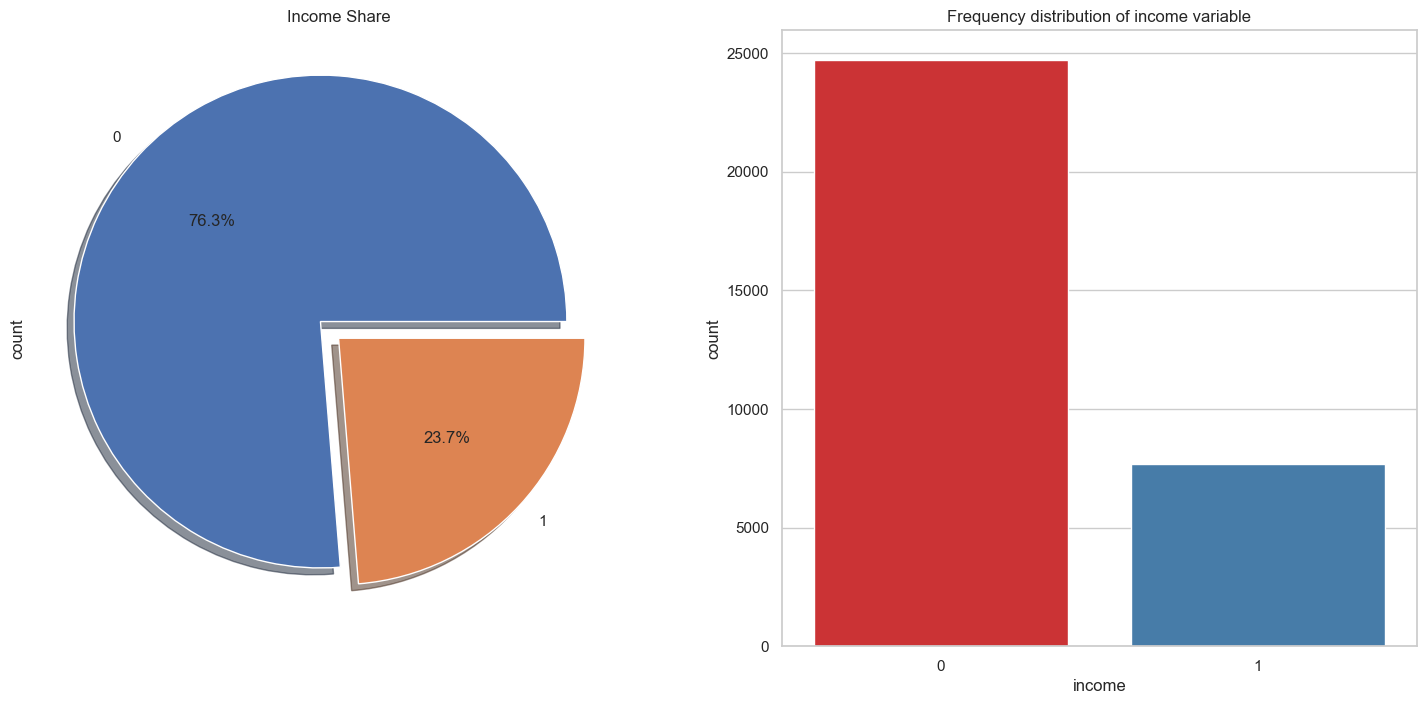

In [71]:
f,ax = plt.subplots(1,2,figsize=(18,8))

ax[0] = df['income'].value_counts().plot.pie(explode=[0.1,0.0],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Income Share')

#f,ax = plt.subplots(figsize=(6,8))
ax[1] = sns.countplot(x='income', data=df, palette="Set1")
ax[1].set_title("Frequency distribution of income variable")

plt.show()

#### Using oversampling method to handle the imbalanced dataset

In [72]:
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import NearMiss

X = df_scaled
y = df.income

# Implement oversampling method
smk = SMOTETomek(random_state=42)
X_res, y_res = smk.fit_resample(X,y)

X_res.shape, y_res.shape

((48178, 13), (48178,))

In [73]:
from collections import Counter
print('Original dataset shape {}'.format(Counter(y)))
print('Resampled dataset shape {}'.format(Counter(y_res)))

Original dataset shape Counter({0: 24717, 1: 7682})
Resampled dataset shape Counter({0: 24089, 1: 24089})


## Data Splitting

In [74]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.20, random_state=101, shuffle=True)

In [75]:
print("X_train shape:",X_train.shape)
print("X_test shape:",X_test.shape)
print("y_train shape:",y_train.shape)
print("y_test shape:",y_test.shape)

X_train shape: (38542, 13)
X_test shape: (9636, 13)
y_train shape: (38542,)
y_test shape: (9636,)


In [76]:
# To store the results of the model
result_dict_train = {}
result_dict_test = {}

## Model Building

### I) Gradient Boosting

In [77]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV

In [78]:
gradient_booster = GradientBoostingClassifier(learning_rate=0.1)
accuracies = cross_val_score(gradient_booster, X_train, y_train, cv=5)
gradient_booster.fit(X_train, y_train)

print("Train score: ", np.mean(accuracies))
print("Test score: ", gradient_booster.score(X_test, y_test))

Train score:  0.8668724503530505
Test score:  0.8603154836031548


In [79]:
result_dict_train["Gradient-Boost Default Train Score"] = np.mean(accuracies)
result_dict_test["Gradient-Boost Default Test Score"] = gradient_booster.score(X_test, y_test)

In [82]:
# Hyperparameter tuning
grid = {
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': np.arange(100, 500, 100),
}

gb = GradientBoostingClassifier()
gb_cv = GridSearchCV(gb, grid, cv=4)
gb_cv.fit(X_train, y_train)
print("Best Parameters: ", gb_cv.best_params_)
print("Train Score: ", gb_cv.best_score_)
print("Test Score: ", gb_cv.score(X_test, y_test))

Best Parameters:  {'learning_rate': 0.1, 'n_estimators': 400}
Train Score:  0.8973846023269856
Test Score:  0.8959111664591116


In [83]:
result_dict_train["Gradient-Boost GridSearch Train Score"] = gb_cv.best_score_
result_dict_test["Gradient-Boost GridSearch Test Score"] = gb_cv.score(X_test,y_test)

### II) Support Vector Classifier

#### Downsampling the data so SVM doesn't take long with cross validation

In [85]:
df_oversampled = pd.concat([X_res, y_res], axis=1)
df_oversampled.sample(5)

,age,workclass,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
36489,0.502808,0.125,0.523500,0.676500,0.333333,0.714286,0.0,1.0,1.0,0.000000,0.0,0.380561,0.926829,1
38939,0.505665,0.500,0.600000,0.800000,0.333333,0.785714,0.0,1.0,1.0,0.000000,0.0,0.495590,0.926829,1
24493,0.328767,0.625,1.000000,0.600000,0.333333,0.785714,0.0,1.0,1.0,0.000000,0.0,0.602041,0.609756,1
43127,0.625790,0.375,1.000000,0.600000,0.333333,0.746222,0.0,1.0,1.0,0.000000,0.0,0.189560,0.926829,1
1780,0.383562,0.000,0.733333,0.533333,0.666667,0.928571,0.2,0.5,1.0,0.080489,0.0,0.397959,0.926829,0


In [89]:
df_less_50 = df_oversampled[df_oversampled['income'] == 0]
df_more_50 = df_oversampled[df_oversampled['income'] == 1]

In [90]:
from sklearn.utils import resample # for downsampling

In [91]:
df_less_50_downsampled = resample(df_less_50,
                                 replace=False,
                                 n_samples=1000,
                                 random_state=42)
len(df_less_50_downsampled)

1000

In [92]:
df_more_50_downsampled = resample(df_more_50,
                                 replace=False,
                                 n_samples=1000,
                                 random_state=42)
len(df_more_50_downsampled)

1000

In [93]:
# Merge the two downsampled datasets
df_downsampled = pd.concat([df_less_50_downsampled, df_more_50_downsampled])
len(df_downsampled)

2000

In [94]:
# The input variables
X = df_downsampled.drop('income', axis=1).copy()
X.head()

,age,workclass,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country
16924,0.547945,0.375,0.733333,0.533333,0.333333,0.928571,0.0,1.0,1.0,0.0,0.0,0.500000,0.926829
3385,0.191781,0.375,0.600000,0.800000,0.666667,0.214286,0.2,1.0,0.0,0.0,0.0,0.397959,0.926829
25653,0.178082,1.000,0.733333,0.533333,0.833333,1.000000,0.8,0.5,0.0,0.0,0.0,0.244898,0.926829
13599,0.041096,0.375,1.000000,0.600000,0.666667,0.500000,0.6,0.5,1.0,0.0,0.0,0.397959,0.926829
2497,0.410959,0.375,0.733333,0.533333,0.333333,0.928571,0.0,1.0,1.0,0.0,0.0,0.244898,0.926829


In [96]:
# The target variable
y = df_downsampled['income'].copy()
y.head()

16924    0
3385     0
25653    0
13599    0
2497     0
Name: income, dtype: int32

In [97]:
# Splitting the data
X_train_svm, X_test_svm, y_train_svm, y_test_svm = train_test_split(X, y, random_state=42)

In [98]:
print("X_train shape:",X_train_svm.shape)
print("X_test shape:",X_test_svm.shape)
print("y_train shape:",y_train_svm.shape)
print("y_test shape:",y_test_svm.shape)

X_train shape: (1500, 13)
X_test shape: (500, 13)
y_train shape: (1500,)
y_test shape: (500,)


In [99]:
# Train the model
from sklearn.svm import SVC
svc = SVC(random_state = 101)
accuracies = cross_val_score(svc, X_train_svm, y_train_svm, cv=5)
svc.fit(X_train_svm, y_train_svm)

print("Train score: ", np.mean(accuracies))
print("Test score: ", svc.score(X_test_svm, y_test_svm))

Train score:  0.8133333333333335
Test score:  0.822


In [100]:
result_dict_train["SVM Default Train Score"] = np.mean(accuracies)
result_dict_test["SVM Default Test Score"] = svc.score(X_test_svm,y_test_svm)

In [101]:
# Hyperparameter tuning
grid = {
    'C': [0.01, 0.1, 1, 10],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'degree': [1, 3, 5, 7],
    'gamma': [0.01, 1]
}

svm_cv = GridSearchCV(SVC(), grid, cv=5)
svm_cv.fit(X_train_svm, y_train_svm)
print("Best Parameters:",svm_cv.best_params_)
print("Train Score:",svm_cv.best_score_)
print("Test Score:",svm_cv.score(X_test_svm,y_test_svm))

Best Parameters: {'C': 0.1, 'degree': 3, 'gamma': 1, 'kernel': 'poly'}
Train Score: 0.8326666666666667
Test Score: 0.838


In [114]:
result_dict_train["SVM Default GridSearch Train Score"] = svm_cv.best_score_
result_dict_test["SVM Default GridSearch Test Score"] = svm_cv.score(X_test_svm,y_test_svm)

## Naive Bayes

In [103]:
from sklearn.naive_bayes import GaussianNB
nb_classifier = GaussianNB()
accuracies = cross_val_score(nb_classifier, X_train_svm, y_train_svm, cv=5)
nb_classifier.fit(X_train_svm, y_train_svm)

print("Train Score:",np.mean(accuracies))
print("Test Score:",nb_classifier.score(X_test_svm,y_test_svm))

Train Score: 0.7793333333333333
Test Score: 0.824


In [104]:
result_dict_train["Naive Bayes Default Train Score"] = np.mean(accuracies)
result_dict_test["Naive Bayes Default Test Score"] = nb_classifier.score(X_test_svm,y_test_svm)

## Logistic Regression

In [105]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(max_iter=5000)
accuracies = cross_val_score(lr_model, X_train_svm, y_train_svm, cv=5)
lr_model.fit(X_train_svm, y_train_svm)

print("Train Score:",np.mean(accuracies))
print("Test Score:",lr_model.score(X_test_svm,y_test_svm))

Train Score: 0.7859999999999999
Test Score: 0.81


In [106]:
result_dict_train["Logistic regression Default Train Score"] = np.mean(accuracies)
result_dict_test["Logistic regression Default Test Score"] = lr_model.score(X_test_svm,y_test_svm)

In [109]:
# Hyperparameter tuning
c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space}

# Instantiating logistic regression classifier
logreg = LogisticRegression(max_iter=4000)

# Instantiating GridSearchCV Object
logreg_cv = GridSearchCV(logreg, param_grid, cv = 5)
logreg_cv.fit(X_train_svm, y_train_svm)

print("Best Parameters:",logreg_cv.best_params_)
print("Train Score:",logreg_cv.best_score_)
print("Test Score:",logreg_cv.score(X_test_svm,y_test_svm))

Best Parameters: {'C': 3.727593720314938}
Train Score: 0.788
Test Score: 0.816


In [110]:
result_dict_train["Logistic Regression GridSearch Train Score"] = logreg_cv.best_score_
result_dict_test["Logistic Regression GridSearch Test Score"] = logreg_cv.score(X_test_svm,y_test_svm)

In [115]:
result_dict_train

{'Gradient-Boost Default Train Score': 0.8668724503530505,
 'Gradient-Boost GridSearch Train Score': 0.8973846023269856,
 'SVM Default Train Score': 0.8133333333333335,
 'Naive Bayes Default Train Score': 0.7793333333333333,
 'Logistic regression Default Train Score': 0.7859999999999999,
 'Logistic Regression GridSearch Train Score': 0.788,
 'SVM Default GridSearch Train Score': 0.8326666666666667}

In [116]:
result_dict_test

{'Gradient-Boost Default Test Score': 0.8603154836031548,
 'Gradient-Boost GridSearch Test Score': 0.8959111664591116,
 'SVM Default Test Score': 0.822,
 'Naive Bayes Default Test Score': 0.824,
 'Logistic regression Default Test Score': 0.81,
 'Logistic Regression GridSearch Test Score': 0.816,
 'SVM Default GridSearch Test Score': 0.838}